In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import pickle
import os 
import matplotlib.pyplot as plt

In [4]:
current_dir = os.getcwd()

# current_dir = os.path.dirname(os.path.abspath(__file__))
csv_path = os.path.join(current_dir, "..", "Data", "label_data_bigfive.csv")
csv_path = os.path.abspath(csv_path)

In [5]:
df_sample =pd.read_csv(csv_path)


In [6]:
df_sample 

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT7,EXT8,EST1,EST2,EST3,...,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN7,OPN10,Clusters
0,0.8,-0.2,1.0,-0.4,1.0,1.0,-0.4,0.2,-0.8,0.8,...,0.8,-0.4,0.8,0.8,1.0,0.2,0.8,1.0,1.0,7
1,0.6,-1.0,0.6,-0.8,0.6,0.4,-1.0,0.4,-0.6,0.8,...,0.6,-0.6,1.0,0.6,0.2,0.4,0.8,0.8,0.6,0
2,0.4,-0.6,0.8,-0.8,0.6,0.2,-0.6,0.8,-0.8,0.8,...,0.8,-0.4,0.8,0.4,1.0,0.2,0.4,1.0,0.8,0
3,0.4,-0.4,0.4,-0.6,0.8,0.4,-0.8,0.6,-0.6,0.6,...,0.4,-0.6,0.2,0.8,0.8,0.4,1.0,0.8,0.6,1
4,0.6,-0.6,0.6,-0.6,1.0,0.6,-1.0,0.2,-1.0,1.0,...,1.0,-0.2,1.0,1.0,1.0,0.2,1.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013553,0.8,-0.4,0.8,-0.6,0.8,0.6,-0.6,0.8,-0.6,0.6,...,0.8,-0.4,0.6,0.6,0.4,0.4,0.8,0.8,0.8,4
1013554,0.8,-0.6,0.8,-0.6,0.6,0.8,-0.8,0.8,-0.6,1.0,...,0.4,-0.6,0.4,0.6,0.8,0.2,1.0,0.6,0.8,4
1013555,0.8,-0.4,0.8,-0.6,1.0,0.8,-0.4,0.6,-0.4,0.8,...,0.2,-0.8,0.2,0.8,1.0,0.2,1.0,1.0,1.0,4
1013556,0.4,-0.8,0.6,-0.8,0.4,0.2,-0.8,0.8,-0.6,0.8,...,0.8,-0.4,0.8,0.8,1.0,0.4,0.8,0.8,0.6,0


In [7]:
def train_model(model,param,X_train, X_test, y_train, y_test,model_name):

    

    # Apply GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5, n_jobs=-1, verbose=2)

    # Fit the model to training data
    grid_search.fit(X_train, y_train)
    
    # Print best parameters from GridSearchCV
    print("Best parameters found: ", grid_search.best_params_)

    # Evaluate the model with best parameters
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred_test = best_model.predict(X_test)

    # Print classification report and accuracy
    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average="weighted")
    recall = recall_score(y_test, y_pred_test, average="weighted")
    f1 = f1_score(y_test, y_pred_test, average="weighted")
    cm = confusion_matrix(y_test, y_pred_test)
    print("==============================")
    print(f"         {model_name}         ")
    print("==============================")
    print("Accuracy:  {:.2f}%".format(accuracy * 100))
    print("Precision:  {:.2f}%".format(precision * 100))
    print("Recall:  {:.2f}%".format(recall * 100))
    print("F1 Score:  {:.2f}%".format(f1 * 100))


    labels = sorted(y_test.unique())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig,ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap='viridis', ax=ax)
    ax.grid(False)
    plt.show()

    return best_model

X = df_sample.drop('Clusters', axis=1)
y = df_sample['Clusters'] 


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': None, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}
         XGBoost         
Accuracy:  81.74%
Precision:  81.80%
Recall:  81.74%
F1 Score:  81.69%


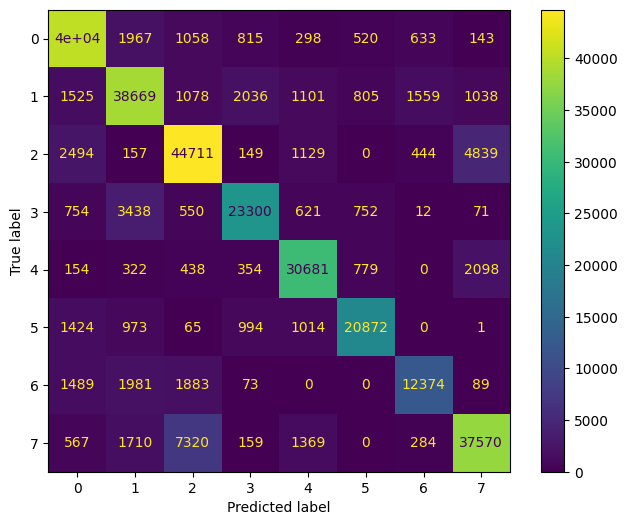

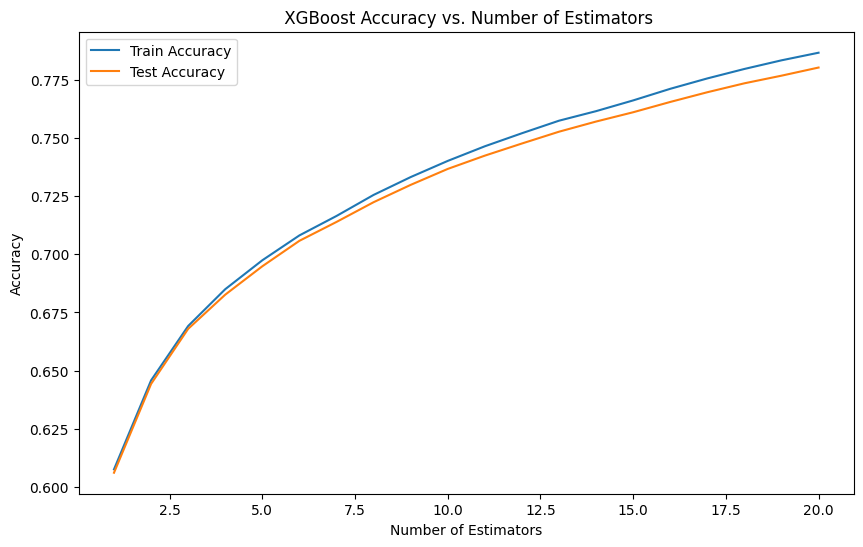

In [8]:
import xgboost as xgb

# Create BGBoost model
xgb_model = xgb.XGBClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100],  # Number of trees to build
    'learning_rate': [ 0.1],  # Step size shrinkage used in updates
    'max_depth': [None],  # Maximum depth of a tree
    'min_child_weight': [1],  # Minimum sum of weights of all observations needed in a child
    'subsample': [1],  # Fraction of samples used for fitting each tree
    'colsample_bytree': [1.0],  # Fraction of features used for tree building
}

XGBoost = train_model(xgb_model,param_grid_xgb,X_train, X_test, y_train, y_test,'XGBoost')

train_accuracies_xgb = []
test_accuracies_xgb = []
n_estimators_list = range(1,21)

for n in n_estimators_list:
    x_xgb =  xgb.XGBClassifier(n_estimators=n, random_state=42)
    x_xgb.fit(X_train, y_train)
    train_accuracies_xgb.append(accuracy_score(y_train, x_xgb.predict(X_train)))
    test_accuracies_xgb.append(accuracy_score(y_test, x_xgb.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_accuracies_xgb, label="Train Accuracy")
plt.plot(n_estimators_list, test_accuracies_xgb, label="Test Accuracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title(" XGBoost"+" Accuracy vs. Number of Estimators")
plt.legend()
plt.show()


In [9]:
# Get current working directory (Notebook/), go to ML/
current_dir = os.getcwd()
root_dir = os.path.abspath(os.path.join(current_dir, "..","artifacts"))  # ML/
# Full path to save the model in ML/
model_path = os.path.join(root_dir, "xgb_model_bigfive.pkl")


# Save the model
with open(model_path, 'wb') as xgboost_big5:
    pickle.dump(XGBoost, xgboost_big5)

print("Model saved to:", model_path)

Model saved to: c:\Users\usEr\Documents\GitHub\Career-path-guidance-web-application\ML\artifacts\xgb_model_bigfive.pkl
